In [2]:
import time
from multiprocessing import Pool

NUM_STEPS = 10000000


def compute_pi_serial():
    time_0 = time.time()
    sum = 0.0
    step = 1.0 / NUM_STEPS
    for i in range(NUM_STEPS):
        x = (i + 0.5) * step
        sum += 4.0 / (1.0 + x * x)
    elap_time = time.time() - time_0
    return step * sum, elap_time


def sum_partial(x_start, x_end, n_steps):
    sum = 0.0
    step = (x_end - x_start) / n_steps
    for i in range(n_steps):
        x = x_start + (i + 0.5) * step
        sum += 4.0 / (1.0 + x * x)
    return step * sum


def compute_pi_parallel(nprocs):
    # no of processes should equally divide NUM_STEPS (for this version)
    if NUM_STEPS % nprocs != 0:
        raise ValueError("nprocs should equally divide NUM_STEPS")
    
    time_0 = time.time()
    n_steps = int(NUM_STEPS / nprocs)
    pool = Pool(nprocs)
    
    # initial values
    ret_vals = []
    step = 1.0 / NUM_STEPS
    x_start = 0
    x_end = step * n_steps
    
    # launch jobs
    for _ in range(nprocs):
        # print('x_start, x_end =', (x_start, x_end))
        ret = pool.apply_async(sum_partial,
                               args=(x_start, x_end, n_steps))
        ret_vals.append(ret)
        x_start += step * n_steps
        x_end += step * n_steps
    
    # check for and reduce values
    sum = 0.0
    for i in range(nprocs):
        sum += ret_vals[i].get(timeout=5)
    
    elap_time = time.time() - time_0
    return sum, elap_time


print(compute_pi_serial())

#print(sum_partial(0.0, 1.0, 10000))

print(compute_pi_parallel(2))

print(compute_pi_parallel(4))

print(compute_pi_parallel(8))

(3.141592653589731, 1.6910369396209717)
(3.141592653589923, 1.0537960529327393)
(3.1415926535896697, 0.5535199642181396)
(3.1415926535898033, 0.44878506660461426)


### Scaling on MacBook
Accurate up to 13 significant digits.
Scalability goes up significantly up to 4-cpu.
System reports cpu_count of 12:

In [9]:
import multiprocessing as mp
print(mp.cpu_count())

12


In [3]:
times = [1.7916069030761719, 0.9835028648376465, 0.5385358333587646, 0.4832189083099365]
y_scale = list(map(lambda x: 1.7916069030761719/x, times))
print(y_scale)

[1.0, 1.8216590587887354, 3.326810941998412, 3.707650657426335]


Text(0, 0.5, 'scale-up')

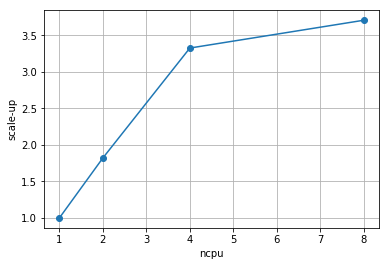

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

x_scale = [1, 2, 4, 8]

plt.plot(x_scale, y_scale, marker='o')
plt.grid('on')
plt.xlabel('ncpu')
plt.ylabel('scale-up')

### Parallel run on 48-cpu system

[0.6718514874031601, 1.1683237711022338, 2.032381053867722, 2.9630571299463186, 4.616068455872868, 5.603273136435118, 4.551499572381411]


Text(0, 0.5, 'scale-up')

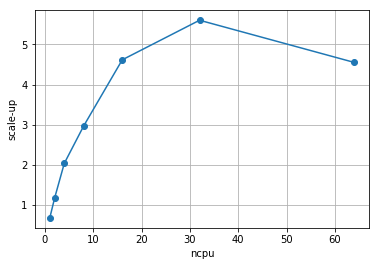

In [8]:
x_scale = [1, 2, 4, 8, 16, 32, 64]
times   = [2.66667103767395, 1.533484935760498, 0.8815310001373291, 0.6046481132507324, 0.3881239891052246, 0.31974291801452637, 0.3936300277709961]
y_scale = list(map(lambda x: 1.7916069030761719/x, times))
print(y_scale)
plt.plot(x_scale, y_scale, marker='o')
plt.grid('on')
plt.xlabel('ncpu')
plt.ylabel('scale-up')

### Plot of the function

101


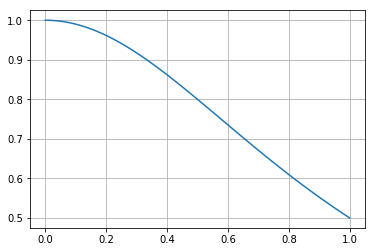

In [17]:
x = list(map(lambda x: float(x)/100., range(101)))
print(len(x))
y = list(map(lambda x: 1.0 / (1.0 + x * x), x))
plt.plot(x, y)
plt.grid('on')